In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
small_3 = np.load('smallest_three.npy')
small_21 = np.load('small_21.npy')

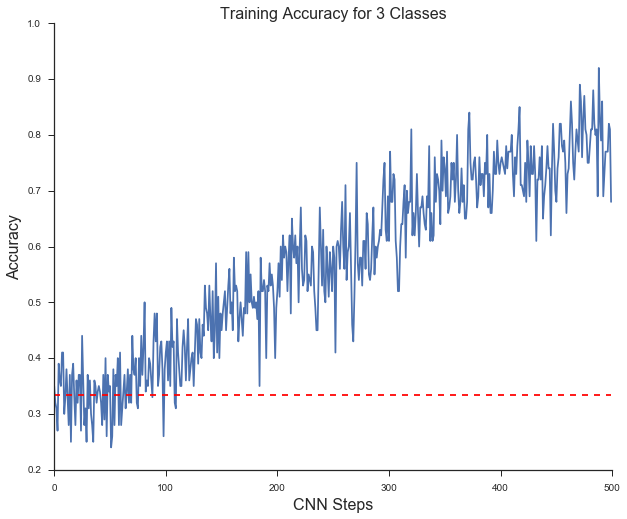

In [70]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_style("white")
sns.set_style("ticks")
plt.plot(small_3)
plt.plot(0.3333*np.ones(len(small_3)), 'r--')
plt.title('Training Accuracy for 3 Classes', fontsize=16)
plt.xlabel('CNN Steps', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
sns.despine()
plt.savefig('small_3.png', bbox_inches='tight')

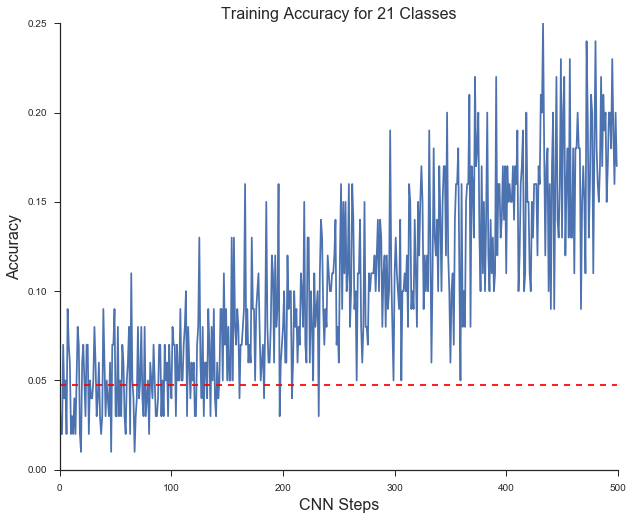

In [71]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_style("white")
sns.set_style("ticks")
plt.plot(small_21)
plt.plot((1/21.0)*np.ones(len(small_3)), 'r--')
plt.title('Training Accuracy for 21 Classes', fontsize=16)
plt.xlabel('CNN Steps', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
sns.despine()
plt.savefig('small_21.png', bbox_inches='tight')

In [16]:
from disk_data_loader import load_from_file
import numpy as np
from scipy.spatial.distance import euclidean
mnist=load_from_file('images.npydata', 'labels.npydata')
#guess_label=np.load('guess_cnn2.npy')
true_label=mnist.labels

ERROR! Session/line number was not unique in database. History logging moved to new session 64


In [24]:
vvals = [(32*i) for i in xrange(1,60)]
hvals = [(32*i) for i in xrange(1,32)]

In [25]:
def calc_angular_error(guess_label, true_label):
    sum_dist = 0.0
    for img in range(np.shape(guess_label)[0]):
        true_idx = np.argmax(true_label[img])
        guess_idx = np.argmax(guess_label[img])
        true_coord = [vvals[true_idx/len(hvals)], hvals[true_idx%len(hvals)]]
        guess_coord = [vvals[guess_idx/len(hvals)], hvals[guess_idx%len(hvals)]]
        sum_dist = sum_dist+euclidean(true_coord, guess_coord)

    avg_angular_error = sum_dist/(32.0*np.shape(guess_label)[0])
    return avg_angular_error

In [53]:
guess_all = np.load('5gd_guess.npy')
true_all = np.load('5gd_true.npy')
gd_1 = np.load('gd_5.npy')

In [54]:
angular_all = []
for run in range(1,101):
    guess_label = guess_all[run*100:(run+1)*100]
    true_label = true_all[run*100:(run+1)*100]
    anglular_error = calc_angular_error(guess_label, true_label)
    angular_all.append(anglular_error)

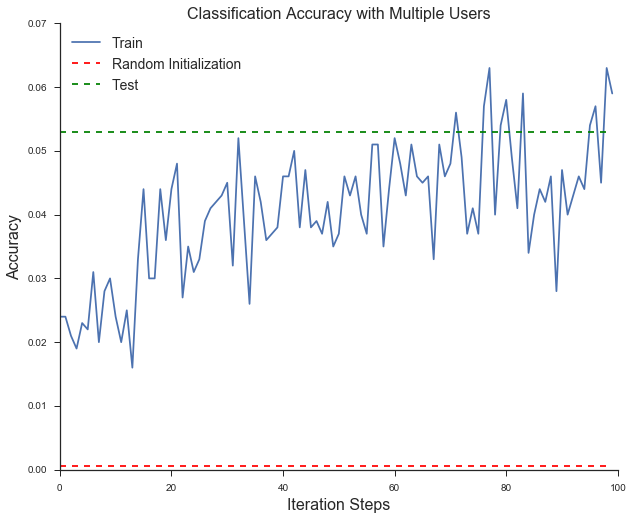

In [55]:
gd_1 = np.load('gd_training_accuracy.npy')
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_style("white")
sns.set_style("ticks")
plt.plot(gd_1)
plt.plot((1/1829.0)*np.ones(len(gd_1)), 'r--')
plt.plot((0.053)*np.ones(len(gd_1)), 'g--')
plt.title('Classification Accuracy with Multiple Users', fontsize=16)
plt.xlabel('Iteration Steps', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Train', 'Random Initialization', 'Test'] , fontsize=14, loc='best')
sns.despine()
plt.savefig('classification_5.png', bbox_inches='tight')

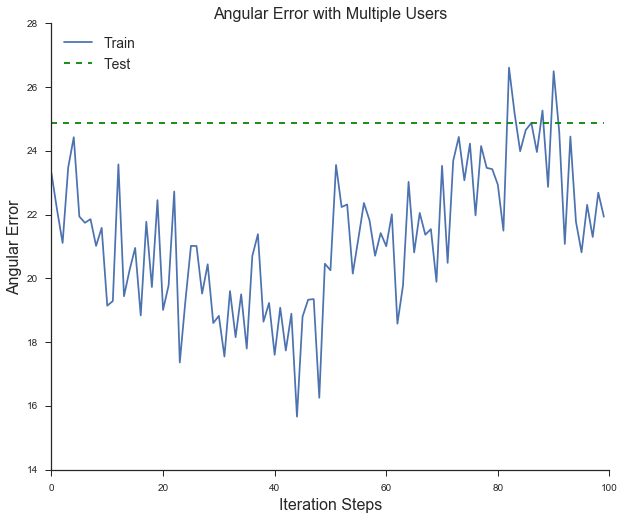

In [58]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_style("white")
sns.set_style("ticks")
plt.plot(angular_all)
plt.plot(24.884*np.ones(len(angular_all)), 'g--')
plt.title('Angular Error with Multiple Users', fontsize=16)
plt.xlabel('Iteration Steps', fontsize=16)
plt.ylabel('Angular Error', fontsize=16)
plt.legend(['Train', 'Test'] , fontsize=14, loc='best')
sns.despine()
plt.savefig('angular_5.png', bbox_inches='tight')

In [57]:
calc_angular_error(gd_1 , mnist.labels)

31.597642264159461